## Cummulative divergence

The empirical cumulative density function (cdf) is defined as:

$$P_{e}(x) = \frac{1}{n}\sum_{i=1}^{n}U(x-x_{i})$$

Here, $U(x)$ is the Heaviside step function — or unit step function — where $U(0) = 0.5$. This function can be interpolated linearly, leading to a continuous distribution $P_{c}$(see reference [3]). The final proposed divergence is then:

$$\hat{D}(P||Q)=\frac{1}{n}\sum_{i=1}^{n}\log\frac{\delta P_{c}(x_{i})}{\delta Q_{c}(x_{i})}$$

where

$$\delta P_{c}(x_{i}) = P_{c}(x_{i}) - P_{c}(x_{i} - \epsilon)$$

The number $\epsilon$ (epsilon) is defined such that it is smaller than the smallest distance between the samples.

### Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
%matplotlib inline

In [2]:
sys.path.append('../src/')

In [3]:
import warnings
warnings.filterwarnings("ignore")

### Generate data

#### Random sample

In [4]:
np.random.seed(101)
n = int(10e5)
reference_data = np.array([np.random.random() for i in range(n)])

#### Visualize noise

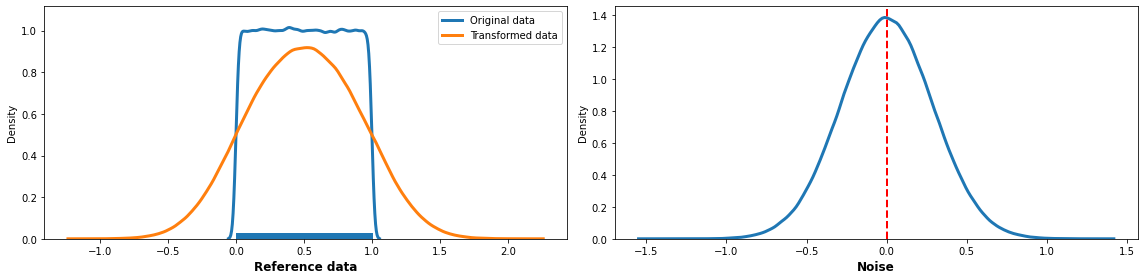

In [5]:
mu, sigma = reference_data.mean(), reference_data.std()
noise = np.random.normal(0, sigma, size=reference_data.shape)
pure = reference_data.copy()
signal = pure + noise

fig, ax = plt.subplots(1, 2, figsize=(16, 4))

ax = ax.ravel()

sns.distplot(noise, ax=ax[1],
             hist=False,
             kde_kws={'lw': 3,'label':'Noise'})

sns.distplot(pure, ax=ax[0],
             hist=False, rug=True,
             kde_kws={"lw": 3,'label': 'Original data'})

sns.distplot(signal, ax=ax[0],
             hist=False,
             kde_kws={"lw": 3, 'label': 'Transformed data'})

ax[0].set_xlabel('Reference data',fontsize=12,weight='bold')
ax[1].set_xlabel('Noise',fontsize=12,weight='bold')
ax[1].axvline(0, linestyle='--', color='red', linewidth=2.0)
ax[0].legend()
fig.tight_layout()

### KL Divergence

#### Setup parameters

In [6]:
from kl_divergence_cummulative import cummulative_kl, ecdf

pure = reference_data.copy()
mu, sigma = pure.mean(), pure.std()
n_bins = 10

#### Normal

##### $\mu = 0, \sigma < 10$

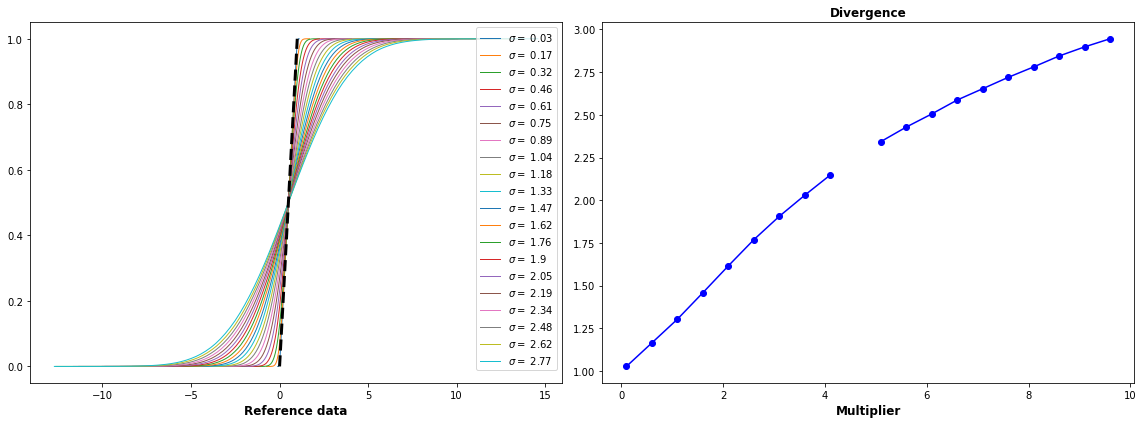

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

kl_divergence = []

multipliers = np.arange(0.1, 10, 0.5)

for m in multipliers: 
    
    noise = np.random.normal(0, sigma * m, size=pure.shape)
    pure = reference_data.copy()
    signal = pure + noise
    divergence = cummulative_kl(pure, signal)
    kl_divergence.append(divergence)
    
    f = ecdf(signal)
    x = np.linspace(signal.min(), signal.max(), 100)
    y = f(x)

    sns.lineplot(x, y, ms=5.0, 
                 linewidth=1.0,
                 ax=ax[0],
                 label=f'$\sigma=$ {round(sigma*m,2)}'
                )
    
f = ecdf(pure)
x_ref = np.linspace(pure.min(), pure.max(), len(pure))
y_ref = f(x_ref)

ax[0].plot(x_ref, y_ref, 'k--', ms=5.0, linewidth=3.0)
ax[1].plot(multipliers, kl_divergence, 'b-o')
ax[0].set_xlabel('Reference data', fontsize=12, weight='bold')
ax[1].set_xlabel('Multiplier', fontsize=12, weight='bold')
ax[1].set_title('Divergence', fontsize=12, weight='bold')
fig.tight_layout()

## References
```LatEx
[1] T. Dasu, S. Krishnan, S. Venkatasubramanian, K. Yi — An information-theoretic approach to detecting changes in multi-dimensional data streams — Interface (2006).

[2]Nielsen, Frank — On the Jensen-Shannon Symmetrization of Distances Relying on Abstract Means — Entropy (2019), vol. 21, issue 5, p. 485.

[3]Fernando Pérez-Cruz — Kullback-Leibler Divergence Estimation of Continuous Distributions — 2007 — Department of Electrical Engineering. Princeton University.

[4]Christian Bauckhage — Computing the Kullback-Leibler Divergence between two Generalized Gamma Distributions — 2014 — University of Bonn.

[5]Thomas Cover, Joy Thomas — Elements of Information Theory — 2nd edition —2006 — Wiley-Interscience
```